 Model için gerekli kütüphanelerin ve veri setinin yüklenmesini gerçekleştirdim.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping

print('Kütüphaneler başarıyla yüklendi')

Kütüphaneler başarıyla yüklendi


Bu kod, Kaggle'daki "Digit Recognizer" projesinden eğitim ve test verilerini okuyarak pandas DataFrame formatında yükler.

In [ ]:
import pandas as pd

# Yüklenen dosyaları okuma
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')


Veri analizi veya ön işleme için train.csv dosyasının ilk 3 satırını görüntüledim.

In [ ]:
data_train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


data_train DataFrame'indeki her sütunun veri türlerini gösterdim.

In [ ]:
data_train.dtypes

,0
label,int64
pixel0,int64
pixel1,int64
pixel2,int64
pixel3,int64
...,...
pixel779,int64
pixel780,int64
pixel781,int64
pixel782,int64


data_test DataFrame'inin ilk 3 satırını görüntüler. Bu, veri setinin yapısını hızlıca incelemek ve verinin doğru şekilde yüklendiğini kontrol etmek için kullandım.



In [ ]:
data_test.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Veri setinin boyutlarını ekrana yazdırdım.

In [ ]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

print(data_train.shape)
print(data_test.shape)

(42000, 785)
(28000, 784)


Veri kümesinden özellikleri (x) ve etiketleri (y) ayırarak eğitim ve test verilerini makine öğrenimi modeline uygun hale getirdim.

In [ ]:
# Eğitim ve test verileri için NumPy dizisi oluştur
# Eğitim verilerinden etiket sütununu ayır ve etiketi y olarak al
x = data_train.loc[:, data_train.columns != 'label'].to_numpy()
y = data_train.loc[:, 'label'].to_numpy()
x_test = data_test.to_numpy()
# Sonuçları kontrol et
print(x[:5, :])
print('------------------------------------')
print(y[:5])
print('------------------------------------')
print(x_test[:5, :])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------------------
[1 0 1 4 0]
------------------------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


x ve y değişkenlerinin veri tiplerini kontrol ederek, NumPy dizisine dönüştürülüp dönüştürülmediğini doğruluyoruz.

In [ ]:
# x ve y'nin NumPy dizisine dönüştüğünü doğrula
print(x.__class__)
print(y.__class__)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


 Eğitim veri kümesini, modelin performansını değerlendirmek için bir eğitim ve doğrulama (validation) veri kümesine bölüyoruz.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(31500, 784) (31500,) (10500, 784) (10500,)


Veri kümesindeki ilk resmin boyutlarını kontrol edip resimlerin doğru şekilde yüklendiğini doğruluyoruz.

In [ ]:
first_image = x_train[0]
first_image_dim = first_image.shape
first_image_dim


(784,)

Eğitim verilerinin ilk görüntüsünü ve bu görüntüye karşılık gelen etiketi (sınıf) ekranda gösteriyoruz.

7


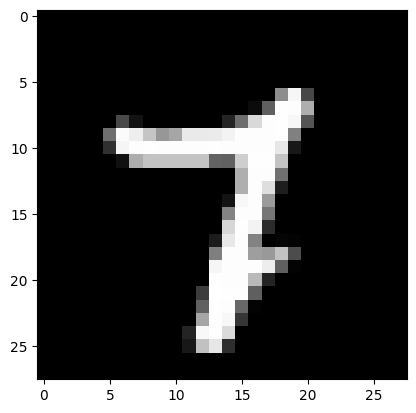

In [ ]:

i = 0
print(y_train[i])
plt.imshow(x_train[i].reshape(28, 28), cmap='gray')

0


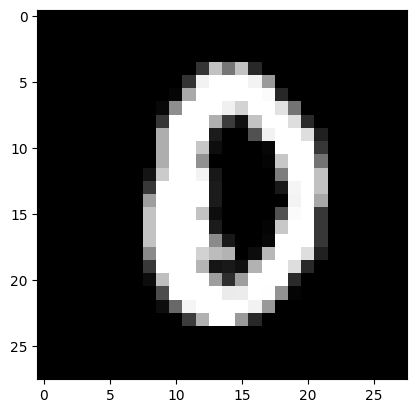

In [ ]:
i = 5
print(y_train[i])
plt.imshow(x_train[i].reshape(28, 28), cmap='gray')

Sınıflandırma problemi çözen bir CNN modeline uygun, one-hot encoding formatında etiketler hazırladım.

In [ ]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_val = to_categorical(y_val, num_classes=10)


In [ ]:

y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:

print(y_val[:5])
print(y_cat_val[:5])


[8 1 9 9 8]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Normalizasyon işlemi, görüntüdeki her pikselin değerini 0 ile 1 arasında bir değere dönüştürmek için 255'e bölmeyi ifade eder. Bu, modelin veriyi daha verimli bir şekilde öğrenmesini sağlar.

In [ ]:
#Veri kümesini 255'e bölerek ölçeklendirin, böylece sayılar 0 ile 1 arasında olur
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

In [ ]:
scaled_single = x_train[0] # x_train dizisindeki ilk elemanı scaled_single değişkenine atar (referans olarak).

scaled_single adlı görüntüyü 28x28 boyutunda yeniden şekillendirir ve gri tonlamalı olarak ekranda gösterir. Bu, genellikle el yazısı rakamlarını (MNIST veri seti gibi) görüntülemek için kullandım

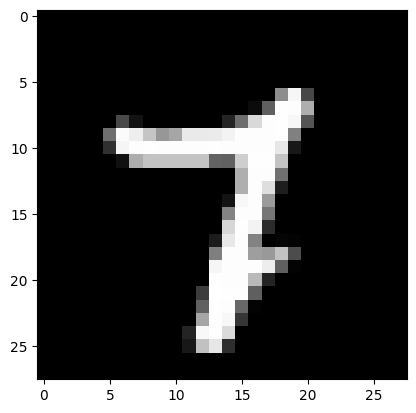

In [ ]:
plt.imshow(np.reshape(scaled_single, (28, 28)), cmap='gray')

Eğitim verilerini 4D bir tensöre dönüştürdüm.

In [ ]:
x_train = np.reshape(x_train, (31500, 28, 28, 1))
print(x_train.shape)

(31500, 28, 28, 1)


In [ ]:
x_val = np.reshape(x_val, (10500, 28, 28, 1))
print(x_val.shape)

(10500, 28, 28, 1)


In [ ]:
x_test = np.reshape(x_test, (28000, 28, 28, 1))
print(x_test.shape)

(28000, 28, 28, 1)


Modelin oluşturulması.
Bu adımda, ağın yapı taşları belirlenir ve ağın nasıl çalışacağı (katmanlar, aktivasyon fonksiyonları, optimizasyon algoritmaları, vb.) tasarladım.

 28x28 boyutlarında gri tonlama resimler ile çalışacak bir konvolüsyonel sinir ağı (CNN) modeli oluşturdum.

In [ ]:
# Modeli hazırlayın
model = Sequential()

# Input katmanını kullanarak giriş verilerinin şeklini tanımlayın, '1' gri tonlamalı resim anlamına gelir
model.add(Input(shape=(28, 28, 1)))

# Konvolüsyonel katman
model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu'))

# Havuzlama (Pooling) katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))

# Resimleri 28*28'den 764'e düzleştir (Flatten)
model.add(Flatten())

# 1. gizli katmanda nöron ekleyin
model.add(Dense(units=256, activation='relu'))

# 2. gizli katmanda nöron ekleyin
model.add(Dense(units=128, activation='relu'))

# 3. gizli katmanda nöron ekleyin
model.add(Dense(units=64, activation='relu'))

# Son katman: 10 olasılık sınıfı olan sınıflandırıcı
model.add(Dense(units=10, activation='softmax'))

# Kullanılabilir diğer metrikler için https://keras.io/metrics adresini kontrol edin
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,222,250 (4.66 MB)

 Trainable params: 1,222,250 (4.66 MB)

 Non-trainable params: 0 (0.00 B)

Makine öğrenmesi modelinin eğitilmesi ve değerlendirilmesi

Model eğitimi sırasında doğrulama kaybını izleyerek, iyileşme olmazsa eğitimi durdurur ve en iyi performans gösteren ağırlıkları geri yüklemesini sağladım.

In [ ]:
# Modeli daha fazla epoch ile tekrar eğit, ancak erken durdurma (early stopping) kullan.
stop_early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# monitor='val_loss': Doğrulama kaybını izler.
# patience=5: Doğrulama kaybı 5 epoch boyunca iyileşmezse eğitim durur.
# restore_best_weights=True: Model en iyi duruma geri döndürülür.



Modelin eğitim verileriyle eğitilmesini, doğrulama verisi ile test edilmesini ve erken durdurma mekanizması kullanılarak gereksiz epoch'lardan kaçınılmasını sağladım.

In [ ]:

model.fit(x=x_train,
          y=y_cat_train,
          validation_data=(x_val, y_cat_val),
          epochs=50,
          callbacks=[early_stop])

Epoch 1/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.8634 - loss: 0.4311 - val_accuracy: 0.9750 - val_loss: 0.0828
Epoch 2/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.9795 - loss: 0.0643 - val_accuracy: 0.9819 - val_loss: 0.0610
Epoch 3/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.9861 - loss: 0.0405 - val_accuracy: 0.9828 - val_loss: 0.0538
Epoch 4/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.9929 - loss: 0.0221 - val_accuracy: 0.9790 - val_loss: 0.0706
Epoch 5/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9938 - loss: 0.0198 - val_accuracy: 0.9790 - val_loss: 0.0749


Keras modelinde kullanılan metriklerin kayıp ve doğruluk isimlerini döndüren  özelliği çalıştırdım.

In [ ]:

model.metrics_names

['loss', 'compile_metrics']

Modelin eğitim sürecindeki metriklerin her epoch için değerlerini bir DataFrame olarak saklamasını sağladım.

In [ ]:

losses = pd.DataFrame(model.history.history)
losses

,accuracy,loss,val_accuracy,val_loss
0,0.934286,0.210516,0.974952,0.082849
1,0.980921,0.061251,0.981905,0.061047
2,0.985683,0.042692,0.982762,0.053781
3,0.990571,0.027805,0.979048,0.070563
4,0.992984,0.021959,0.979048,0.074921


Modelin eğitim doğruluğu (accuracy) ve doğrulama doğruluğunu (val_accuracy) bir grafik üzerinde karşılaştırarak görselleştirdim

<Axes: >

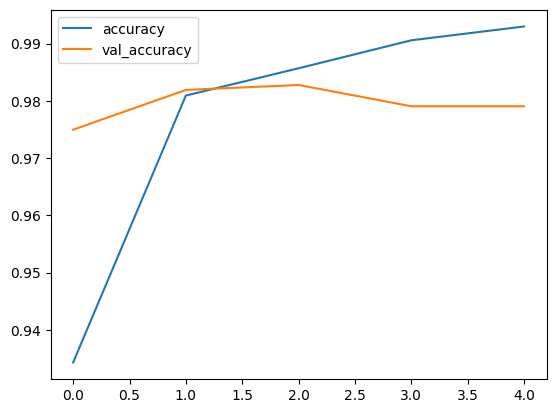

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()


 Modelin eğitim kaybı (loss) ve doğrulama kaybını (val_loss) bir grafik üzerinde görselleştirdim

<Axes: >

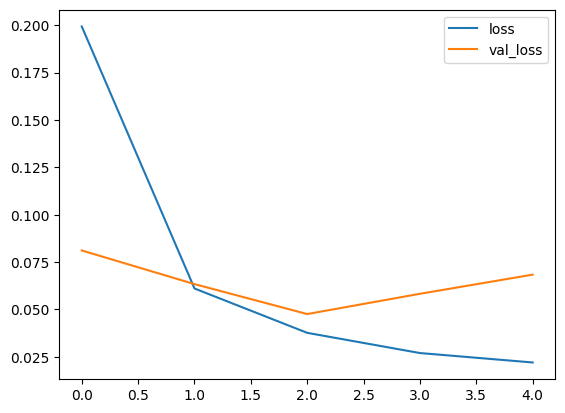

In [ ]:
losses[['loss', 'val_loss']].plot()


Bu kod, modelin değerlendirilmesinde kullanılan metriklerin isimlerini ve doğrulama verisi (x_val, y_cat_val) üzerindeki model performansını yazdırdım.

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_val, y_cat_val, verbose=0))


['loss', 'compile_metrics']
[0.08284873515367508, 0.9749523997306824]


SONUÇLAR:

x_test üzerinde modelin tahminlerini yapıp ve her tahminin en yüksek olasılığa sahip sınıfının indeksini  alarak tahminleri sıralıyorum.

In [ ]:
predictions = [np.argmax(pred) for pred in model.predict(x_test)]


875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


In [ ]:
predictions.__getitem__(0)# predictions listesinin ilk elemanını alır


2

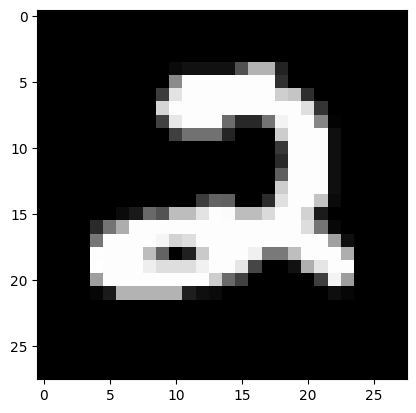

In [ ]:
import matplotlib.pyplot as plt

# x_test[0] görüntüsünü siyah-beyaz (grayscale) olarak göster
plt.imshow(x_test[0], cmap='gray')
plt.show()


In [ ]:
from itertools import islice

# predictions listesinin ilk 20 elemanını almak için islice kullanımı
list(islice(predictions, 20))


[2, 0, 9, 7, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0]

In [ ]:
# 'predictions' dizisini 'Label' adında yeni bir sütun olarak 'data_test' DataFrame'ine ekliyoruz
data_test['Label'] = predictions

# Güncellenmiş DataFrame'in ilk 5 satırını görüntülüyoruz
data_test.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
# data_test'in satır ve sütun sayısını döndürür
data_test.shape[0], data_test.shape[1]


(28000, 785)

In [ ]:
# data_test DataFrame'inden yalnızca 'Label' sütununu seç
test_df = data_test.loc[:, ['Label']]

# 1'den başlayarak 28000'e kadar sıralı bir 'ImageId' sütunu ekle
test_df['ImageId'] = range(1, len(data_test) + 1)

# 'ImageId' sütununu ilk sıraya alacak şekilde sütunları yeniden sırala
test_df = test_df[['ImageId', 'Label']]


In [ ]:
test_df.to_csv('submission.csv', index=False)

In [ ]:
test_df.head(3)


,ImageId,Label
0,1,2
1,2,0
2,3,9
